## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## analise exploratoria dataframe notas

In [2]:
notas = pd.read_csv("ml-latest-small/ratings.csv",header=0 ,
                    names=["usuarioId", "filmeId", "nota", "momento"],
                    usecols=["usuarioId", "filmeId", "nota"])
notas.head()

,usuarioId,filmeId,nota
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [3]:
print(notas.nota.unique())
notas['nota'].value_counts()

[4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]


4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [4]:
print("Media:",notas.nota.mean())
print("Mediana:",notas.nota.median())

Media: 3.501556983616962
Mediana: 3.5


In [5]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

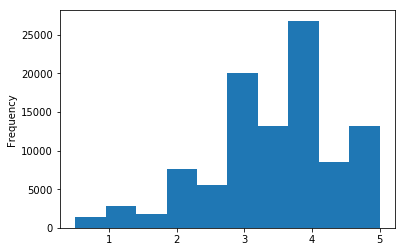

In [6]:
notas.nota.plot(kind="hist")

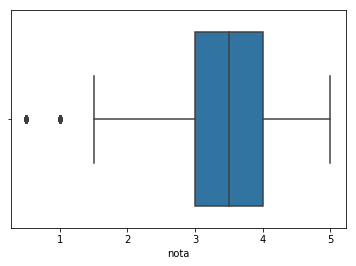

In [7]:
sns.boxplot(notas.nota)

## Carregando filmes dataframe

In [8]:
filmes = pd.read_csv("ml-latest-small/movies.csv",header=0 ,
                    names=["filmeId", "titulo", "genero"])
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
notas.query("filmeId == 1").mean().nota

3.9209302325581397

In [10]:
notas.query("filmeId == 2").mean().nota

3.4318181818181817

In [11]:
medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [15]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

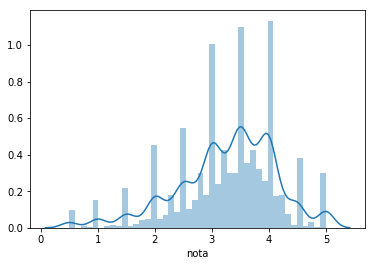

In [12]:
#sns.distplot(medias_por_filme, bins=10)
sns.distplot(medias_por_filme)

Text(0.5,1,'Histograma das médias dos filmes')

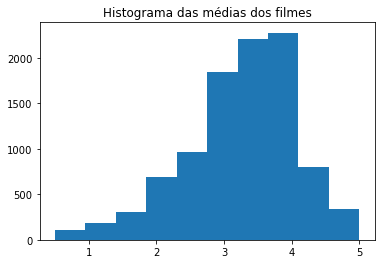

In [13]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

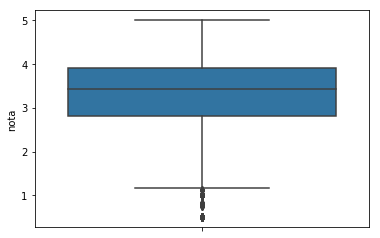

In [14]:
#plt.figure(figsize=(5,8))

sns.boxplot(y=medias_por_filme)